<h2>Import Libararies</h2>

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten
from tensorflow_addons.metrics import MultiLabelConfusionMatrix

import matplotlib.pyplot as plt

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


<h2>Load Dataset</h2>

In [2]:
X, y = load_digits(return_X_y=True)

<h2>Data Preprocessing</h2>

In [3]:
print(f'Pixels per image: ', X[0].shape)
print(f'Number of samples: ', y.shape)

Pixels per image:  (64,)
Number of samples:  (1797,)


In [4]:
X = X.reshape((-1, 8, 8)) / 16

<h2>EDA</h2>

Let's see the images of each number type in the dataset.

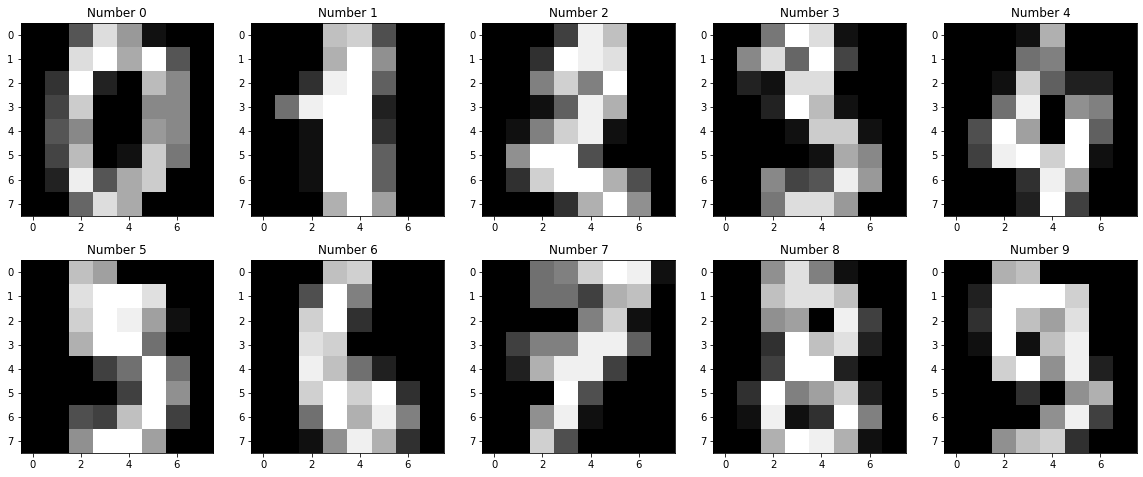

In [5]:
fig, ax = plt.subplots(figsize=(20, 8), ncols=5, nrows=2)

i = 0
for row in range(2):
    for col in range(5):
        index = np.where(y == i)[0][0]
        ax[row][col].imshow(X[index].reshape((8,8)), cmap='gray')
        ax[row][col].set_title(f'Number {i}')

        i += 1

Plotting the distribution of the dataset, based on the number of samples available from each category.

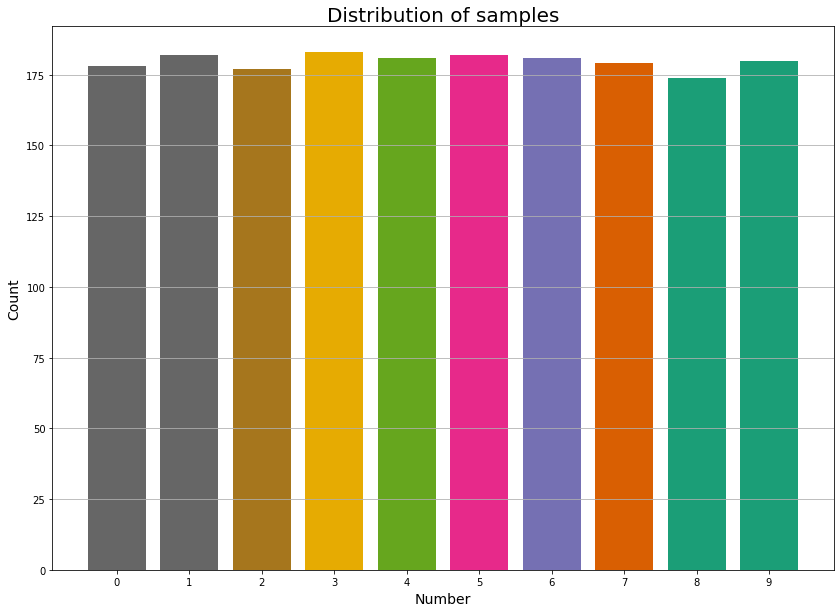

In [6]:
plt.figure(figsize=(14, 10))

y_unique, y_counts = np.unique(y, return_counts=True)

plt.bar(y_unique, y_counts,
         color=[plt.cm.get_cmap('Dark2_r', 10)(i) for i in range(10)])
plt.title('Distribution of samples', fontsize=20, pad=5)
plt.xlabel('Number', fontsize=14, labelpad=5)
plt.ylabel('Count', fontsize=14, labelpad=5)
plt.xticks(list(range(10)))
plt.grid(axis='y')

plt.show()

<h2>Model</h2>

In [7]:
y = np.array(tf.one_hot(y, 10))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

NameError: name 'tf' is not defined

In [8]:
y_train.shape

(1437, 10)

In [9]:
def plot_history(history):
    """Plot graph of loss, validation loss, accuracy and 
    validation accuracy after model training
    """

    fig, ax = plt.subplots(figsize=(16, 4), nrows=1, ncols=2)
    
    ax[0].plot(history.history['loss'], color='cyan')
    ax[0].plot(history.history['val_loss'], color='orange')
    ax[0].set_title('Loss', fontsize=20, pad=5)
    ax[0].set_xlabel('Epoch', fontsize=14, labelpad=5)
    ax[0].set_ylabel('Epoch', fontsize=14, labelpad=5)
    ax[0].legend(['train', 'validation'])

    ax[1].plot(history.history['accuracy'], color='cyan')
    ax[1].plot(history.history['val_accuracy'], color='orange')
    ax[1].set_title('Accuracy', fontsize=20, pad=5)
    ax[1].set_xlabel('Epoch', fontsize=14, labelpad=5)
    ax[1].set_ylabel('Epoch', fontsize=14, labelpad=5)
    ax[1].legend(['train', 'validation'])
    
    plt.show()

In [10]:
model = Sequential()
model.add(Conv1D(32, 2, input_shape=(8, 8,), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile(optimizer='Adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 7, 32)             544       
_________________________________________________________________
flatten (Flatten)            (None, 224)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               28800     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 30,634
Trainable params: 30,634
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train, y_train, batch_size=100, epochs=100, validation_split=0.2)

Epoch 1/100
12/12 [==============================] - 1s 38ms/step - loss: 2.2172 - accuracy: 0.2613 - val_loss: 1.9449 - val_accuracy: 0.6875
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 1.8351 - accuracy: 0.7032 - val_loss: 1.5235 - val_accuracy: 0.7812
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 1.3770 - accuracy: 0.8351 - val_loss: 1.0438 - val_accuracy: 0.8646
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 0.9257 - accuracy: 0.8802 - val_loss: 0.6867 - val_accuracy: 0.8681
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 0.6134 - accuracy: 0.8905 - val_loss: 0.4687 - val_accuracy: 0.8958
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.4241 - accuracy: 0.9151 - val_loss: 0.3721 - val_accuracy: 0.8924
Epoch 7/100
12/12 [==============================] - 0s 10ms/step - loss: 0.3136 - accuracy: 0.9378 - val_loss: 0.3111 - val_accuracy: 0.9132
Epoch 8/10

In [12]:
y_train.shape

(1437, 10)

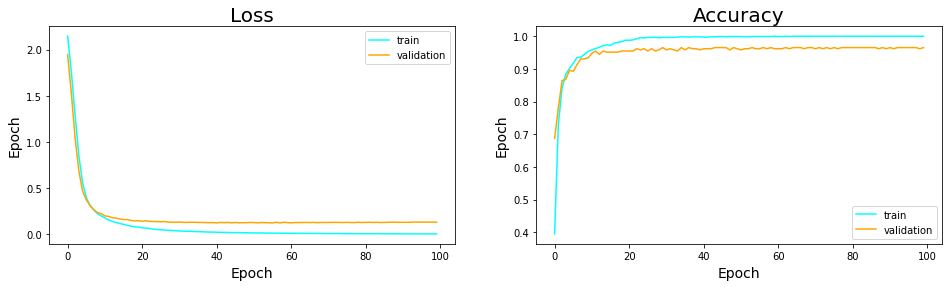

In [13]:
plot_history(history)

<h2>Model Evaluation</h2>

In [14]:
model.evaluate(X_train, y_train)

45/45 [==============================] - 0s 2ms/step - loss: 0.0284 - accuracy: 0.9930


[0.02839951403439045, 0.9930410385131836]

In [15]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 4ms/step - loss: 0.0586 - accuracy: 0.9861


[0.05857405066490173, 0.9861111044883728]

In [16]:
# Confusion matrix on the test dataset
y_test_prediction = model.predict(X_test)

metric = tfa.metrics.MultiLabelConfusionMatrix(num_classes=10)
metric.update_state(y_test, y_test_prediction)

metric.result()

<tf.Tensor: shape=(10, 2, 2), dtype=float32, numpy=
array([[[322.,   0.],
        [ 36.,   2.]],

       [[328.,   0.],
        [ 32.,   0.]],

       [[319.,   0.],
        [ 21.,  20.]],

       [[327.,   0.],
        [ 19.,  14.]],

       [[323.,   0.],
        [ 18.,  19.]],

       [[322.,   0.],
        [ 27.,  11.]],

       [[325.,   0.],
        [ 35.,   0.]],

       [[322.,   0.],
        [ 31.,   7.]],

       [[327.,   0.],
        [ 33.,   0.]],

       [[325.,   0.],
        [ 34.,   1.]]], dtype=float32)>